In [2]:
%pip install numpy pandas
import numpy as np
import pandas as pd

datatrain1=pd.read_csv('Batch1e.csv')
datatrain2=pd.read_csv('Batch2e.csv')
datatrain3=pd.read_csv('Batch3e.csv')
datatrain4=pd.read_csv('Batch4e.csv')
datatrain5=pd.read_csv('Batch5e.csv')
datatrain6=pd.read_csv('Batch6e.csv')
datatrain7=pd.read_csv('Batch7e.csv')
datatrain8=pd.read_csv('Batch8e.csv')
datatrain9=pd.read_csv('Batch9e.csv')
datatrain10=pd.read_csv('Batch10e.csv')

Note: you may need to restart the kernel to use updated packages.


In [3]:
print(datatrain1.shape)

(444, 129)


In [4]:
X1=np.array(datatrain1)
X2=np.array(datatrain2)
X3=np.array(datatrain3)
X4=np.array(datatrain4)
X5=np.array(datatrain5)
X6=np.array(datatrain6)
X7=np.array(datatrain7)
X8=np.array(datatrain8)
X9=np.array(datatrain9)
X10=np.array(datatrain10)

array_list=[X1,X2,X3,X4,X5,X6,X7,X8,X9,X10]
sample = np.concatenate([X1, X2])
lengths = [len(X1), len(X2)]
datatrain_array=np.vstack(array_list)
print(datatrain_array.shape);

(13900, 129)


In [5]:
%pip install scikit-learn
from sklearn.preprocessing import MaxAbsScaler

xtrain = datatrain_array[:,1:130]
ytrain = datatrain_array[:,0]



max_abs_scaler = MaxAbsScaler()
xtrain = max_abs_scaler.fit_transform(xtrain)  
print(ytrain.shape);

Note: you may need to restart the kernel to use updated packages.
(13900,)


In [6]:
%pip install keras 
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=.1,random_state=1)

#changing target format
y_train = np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
print(ytrain.shape)

Note: you may need to restart the kernel to use updated packages.
(13900,)


In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(129, input_dim=128, kernel_initializer='uniform', activation='relu'))
model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(80, kernel_initializer='uniform', activation='relu'))
model.add(Dense(7, kernel_initializer='uniform', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['mse', 'mae', 'mape', 'acc'])
# model.save("model.h")

# rename history object to MLP
MLP = model.fit(X_train, y_train, epochs=150, batch_size=150000,
                validation_split=0.33, verbose=0)

y_pred = model.predict(X_test)
accuracy = np.array(MLP.history['acc'])

# print('ground truth     : ', y_test)
# print('predicted class  : ', y_pred)
# print('model accuracy   : ', accuracy[199])

for epoch, acc in enumerate(MLP.history['acc']):
    print(f"Epoch {epoch + 1}: accuracy={acc}")


2023-04-26 12:16:49.250512: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


44/44 [==============================] - 0s 326us/step
Epoch 1: accuracy=0.31404367089271545
Epoch 2: accuracy=0.20987948775291443
Epoch 3: accuracy=0.20987948775291443
Epoch 4: accuracy=0.20987948775291443
Epoch 5: accuracy=0.20987948775291443
Epoch 6: accuracy=0.20987948775291443
Epoch 7: accuracy=0.20987948775291443
Epoch 8: accuracy=0.20987948775291443
Epoch 9: accuracy=0.20987948775291443
Epoch 10: accuracy=0.20987948775291443
Epoch 11: accuracy=0.20987948775291443
Epoch 12: accuracy=0.20987948775291443
Epoch 13: accuracy=0.20987948775291443
Epoch 14: accuracy=0.20987948775291443
Epoch 15: accuracy=0.20987948775291443
Epoch 16: accuracy=0.20987948775291443
Epoch 17: accuracy=0.20987948775291443
Epoch 18: accuracy=0.20987948775291443
Epoch 19: accuracy=0.20987948775291443
Epoch 20: accuracy=0.20987948775291443
Epoch 21: accuracy=0.20987948775291443
Epoch 22: accuracy=0.20987948775291443
Epoch 23: accuracy=0.20987948775291443
Epoch 24: accuracy=0.20987948775291443
Epoch 25: accuracy

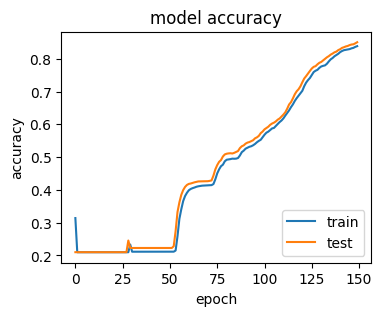

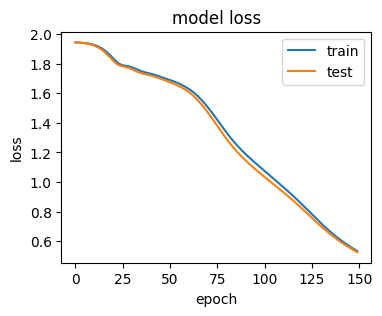

In [8]:
import matplotlib.pyplot as plt

# summarize history for accuracy
fig = plt.figure(figsize=(4, 3))
plt.plot(MLP.history['acc'])
plt.plot(MLP.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
rootdir = '/Users/takshilrastogi/Desktop/Dataset'
# plt.savefig(rootdir, figsize=(4, 3), dpi=500,bbox_inches='tight', labelsize=11)
plt.show()

# summarize history for loss
fig = plt.figure(figsize=(4, 3))
plt.plot(MLP.history['loss'])
plt.plot(MLP.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
rootdir = '/Users/takshilrastogi/Desktop/Dataset'
# plt.savefig(rootdir, figsize=(4, 3), dpi=500,bbox_inches='tight', labelsize=11)
plt.show()


In [9]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

# Convert TFLite model to C array
with open("./gas_detection.ino/model.h", "w") as f:
    f.write("const unsigned char model[] = {\n")
    for i, val in enumerate(tflite_model):
        if i % 12 == 0:
            f.write(" ")
        f.write("0x{:02x}, ".format(val))
        if i > 0 and i % 11 == 0:
            f.write("\n")
    f.write("};")


INFO:tensorflow:Assets written to: /var/folders/n9/5dh9tpc57dddst3b6cdmr7xm0000gn/T/tmpearcw5kn/assets


2023-04-26 12:16:54.543290: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-04-26 12:16:54.543301: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
